In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

In [2]:
df = pd.read_csv('./data.csv')

In [4]:
df.head()


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [6]:
# Lets remove the 'Unnamed: 0' column 
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
# Check for missing values in our data. No Missing values which is good
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [13]:
# lets see the types. All numbers except for the song title and the artist
df.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [18]:
round(df.describe(), 2)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00
mean,0.19,0.62,246306.20,0.68,0.13,5.34,0.19,-7.09,0.61,0.09,121.60,3.97,0.50,0.51
std,0.26,0.16,81981.81,0.21,0.27,3.65,0.16,3.76,0.49,0.09,26.69,0.26,0.25,0.50
min,0.00,0.12,16042.00,0.01,0.00,0.00,0.02,-33.10,0.00,0.02,47.86,1.00,0.03,0.00
25%,0.01,0.51,200015.00,0.56,0.00,2.00,0.09,-8.39,0.00,0.04,100.19,4.00,0.30,0.00
50%,0.06,0.63,229261.00,0.72,0.00,6.00,0.13,-6.25,1.00,0.05,121.43,4.00,0.49,1.00
75%,0.26,0.74,270333.00,0.85,0.05,9.00,0.25,-4.75,1.00,0.11,137.85,4.00,0.69,1.00
max,1.00,0.98,1004627.00,1.00,0.98,11.00,0.97,-0.31,1.00,0.82,219.33,5.00,0.99,1.00


In [19]:
columns = df.columns
columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [21]:
df.info()
# we have 15 total features and 1 target variable. 13 are Numerical, 2 are categorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [22]:
categoricals = df.select_dtypes('object').columns.tolist()
categoricals

['song_title', 'artist']

In [29]:
numericals = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numericals

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'target']

In [35]:
df.corr(numeric_only=True)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
acousticness,1.000000,-0.179894,0.071536,-0.646319,0.144397,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,-0.127596,-0.190353,-0.152227,-0.129627
danceability,-0.179894,1.000000,0.004695,0.038557,-0.130561,0.022325,-0.132044,0.104362,-0.047867,0.142661,-0.143538,0.128909,0.442061,0.176706
duration_ms,0.071536,0.004695,1.000000,-0.144473,0.305403,0.023570,0.023203,-0.273798,-0.074806,-0.079562,-0.076469,-0.040157,-0.120030,0.146749
energy,-0.646319,0.038557,-0.144473,1.000000,-0.122890,0.072886,0.217435,0.762177,-0.070263,0.093102,0.165721,0.182895,0.278383,0.039688
instrumentalness,0.144397,-0.130561,0.305403,-0.122890,1.000000,-0.009640,0.001063,-0.354625,-0.030099,-0.155349,0.000347,-0.070721,-0.194630,0.152594
key,-0.081037,0.022325,0.023570,0.072886,-0.009640,1.000000,0.049739,0.050929,-0.195040,0.019116,0.040301,0.024937,0.032485,0.033594
liveness,-0.117126,-0.132044,0.023203,0.217435,0.001063,0.049739,1.000000,0.156648,-0.018587,0.092403,0.010558,0.018199,-0.053011,0.026364
loudness,-0.562021,0.104362,-0.273798,0.762177,-0.354625,0.050929,0.156648,1.000000,-0.044015,0.088844,0.156418,0.143011,0.204968,-0.072000
mode,0.068028,-0.047867,-0.074806,-0.070263,-0.030099,-0.195040,-0.018587,-0.044015,1.000000,-0.049398,-0.059995,-0.039038,-0.032879,-0.072336
speechiness,-0.099893,0.142661,-0.079562,0.093102,-0.155349,0.019116,0.092403,0.088844,-0.049398,1.000000,0.111359,0.113529,0.054419,0.154006


<Axes: >

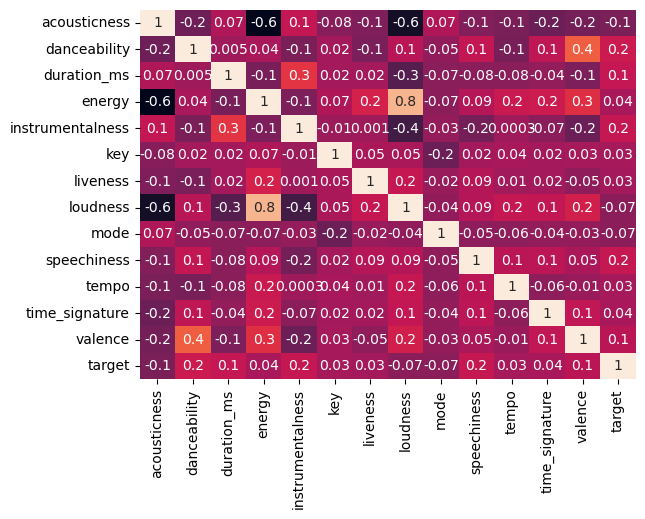

In [44]:
# Lets plot this in a heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1g', cbar=False)
# High value shown for loudness/energy
# low correlation for accousticness and energy + loudness

In [49]:
# Lets look at our target data. Nearly identical values - 1 = liked song, and 0 = did not like
target_data = df['target'].value_counts()
target_data

1    1020
0     997
Name: target, dtype: int64

In [50]:
target_data_perc = df['target'].value_counts(True)
target_data_perc

1    0.505702
0    0.494298
Name: target, dtype: float64

([<matplotlib.patches.Wedge at 0x1373e4510>,
 [Text(-0.01970206079978362, 1.099823544392573, 'Liked'),
  Text(0.019702060799783244, -1.099823544392573, 'Not Liked')],
 [Text(-0.010746578618063793, 0.5999037514868579, '50.6%'),
  Text(0.010746578618063586, -0.5999037514868579, '49.4%')])

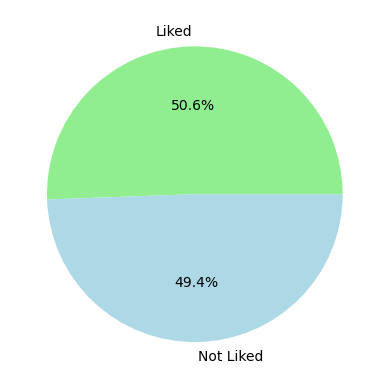

In [53]:
plt.pie(target_data, colors=['lightgreen', 'lightblue'], labels=['Liked', 'Not Liked'], autopct='%1.1f%%')

In [72]:
# Because we have the name of Artists, let see which artists repeat the most. 
counts = df['artist'].value_counts().tolist()[:25]
artists = list(dict(df['artist'].value_counts()).keys())[:25]


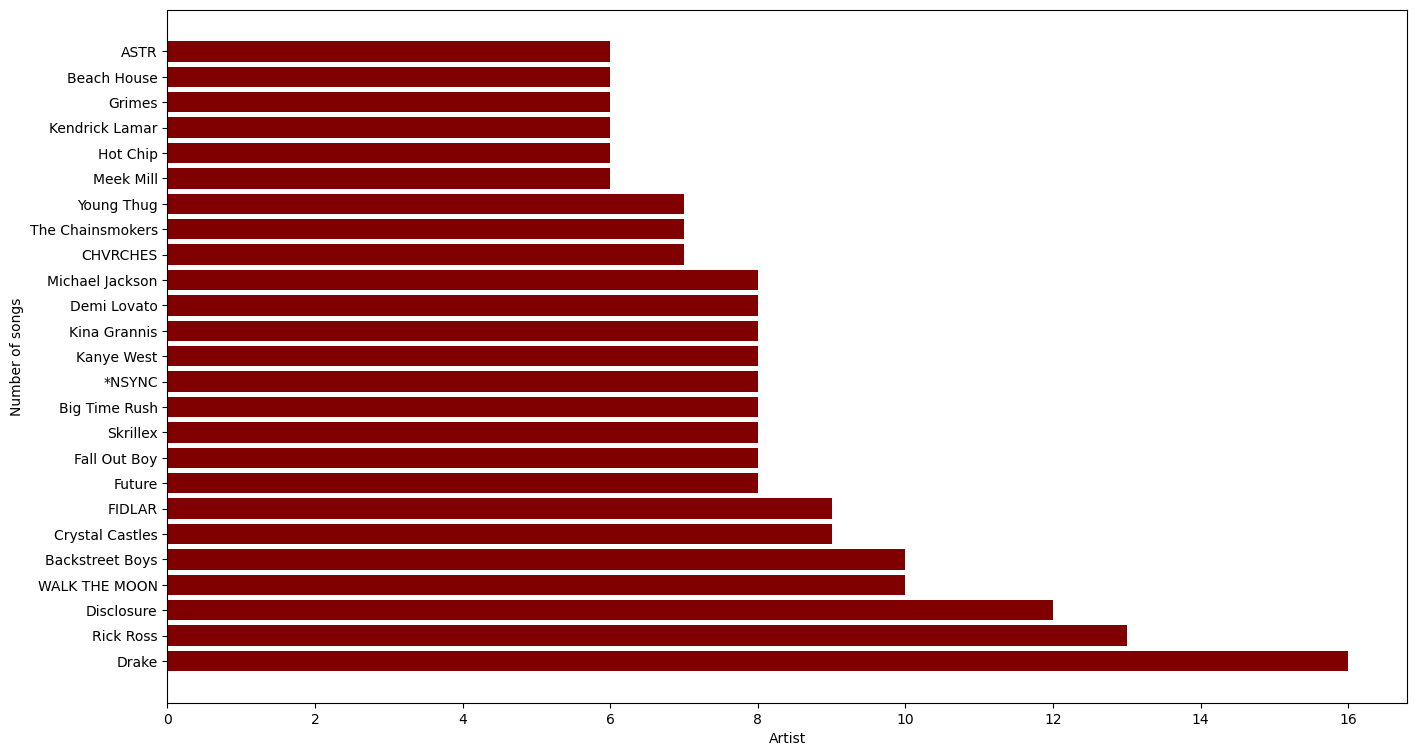

In [74]:
fig = plt.figure(figsize=(16, 9))
plt.barh(artists, counts, color='maroon')
plt.xlabel('Artist')
plt.ylabel('Number of songs')
plt.show()


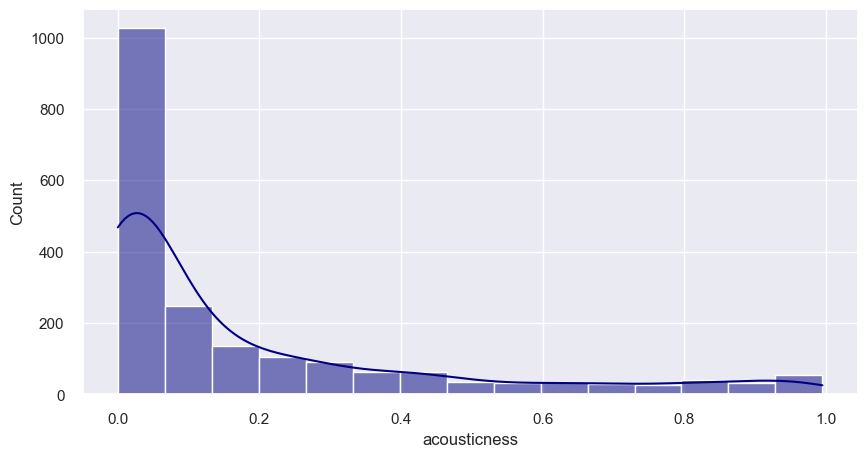

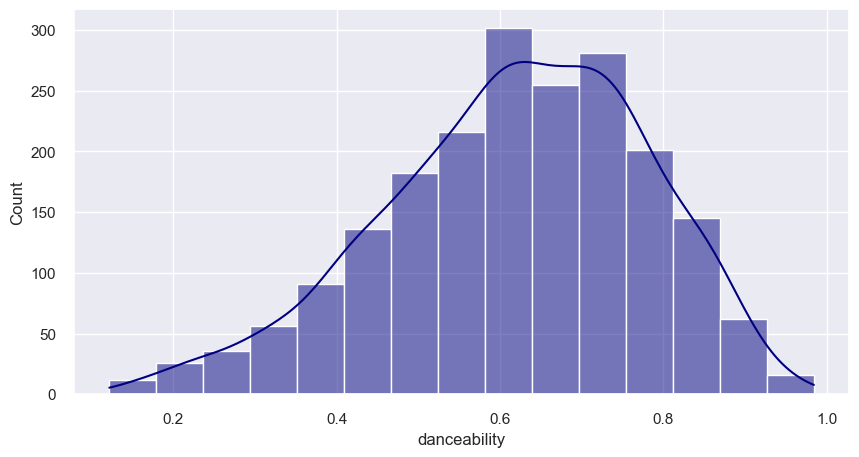

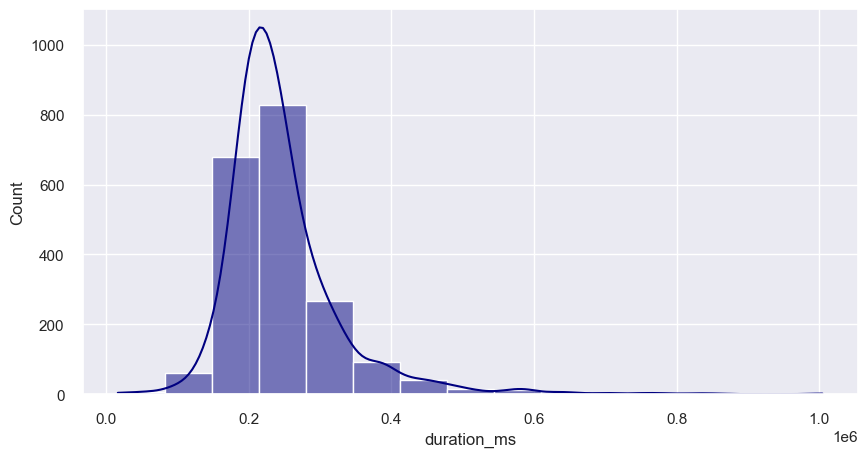

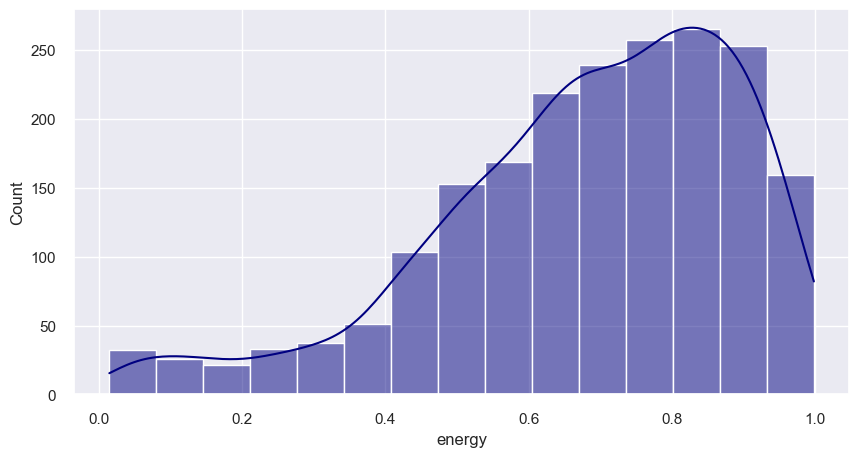

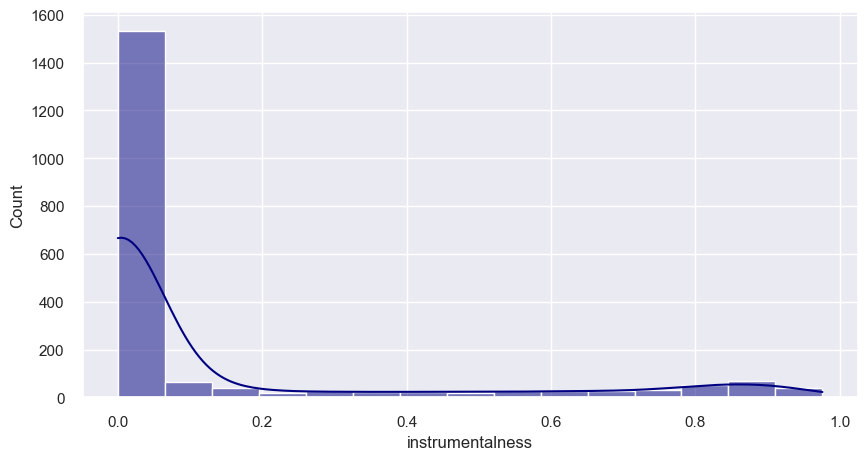

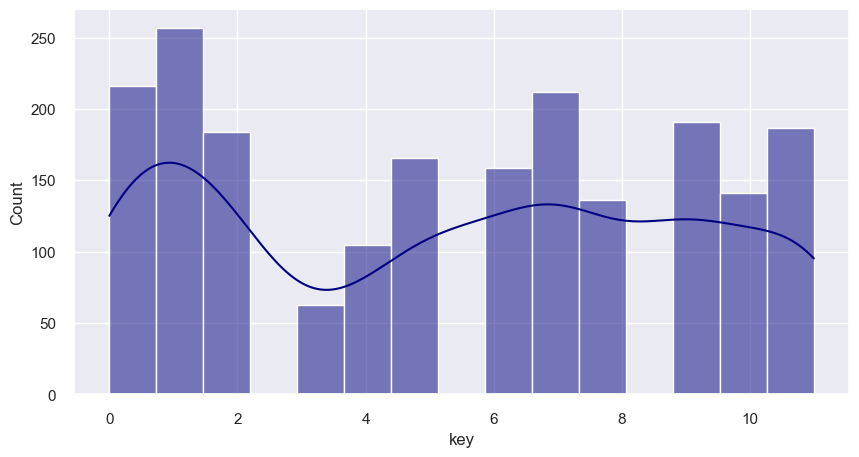

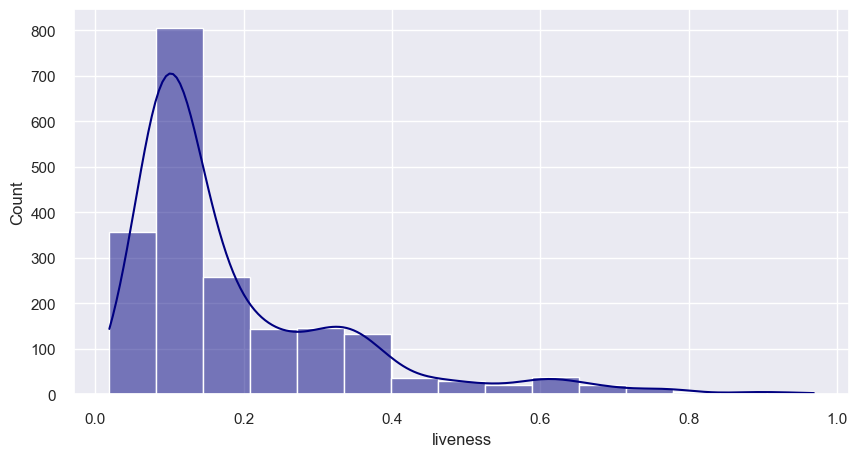

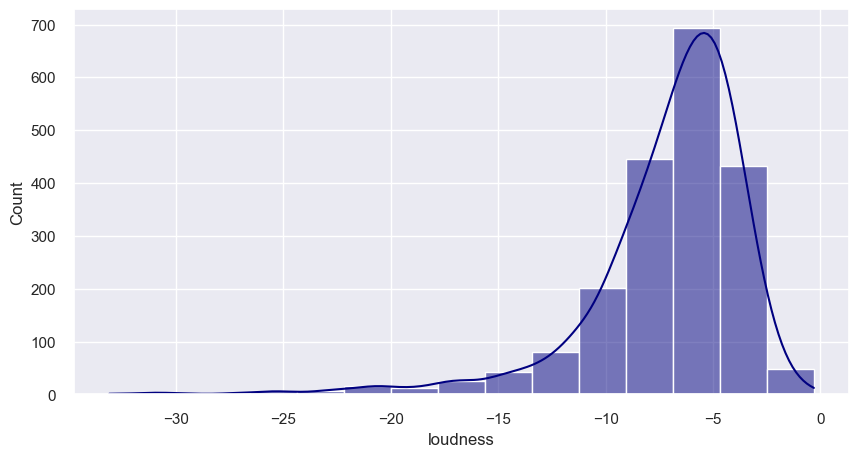

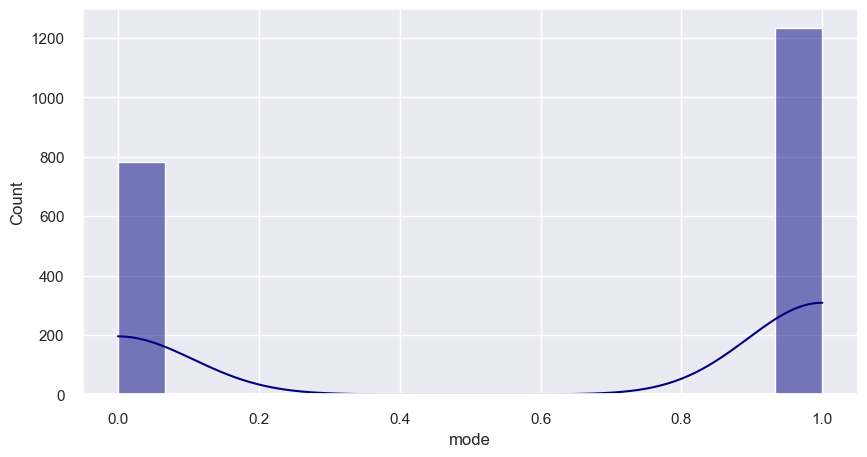

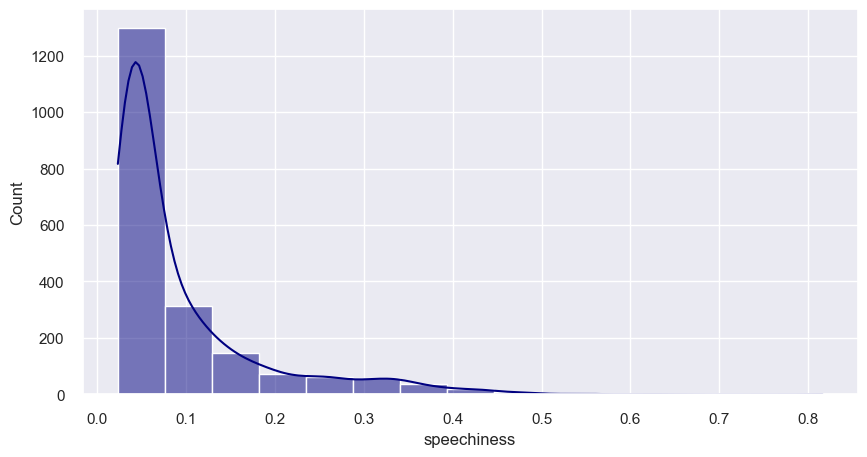

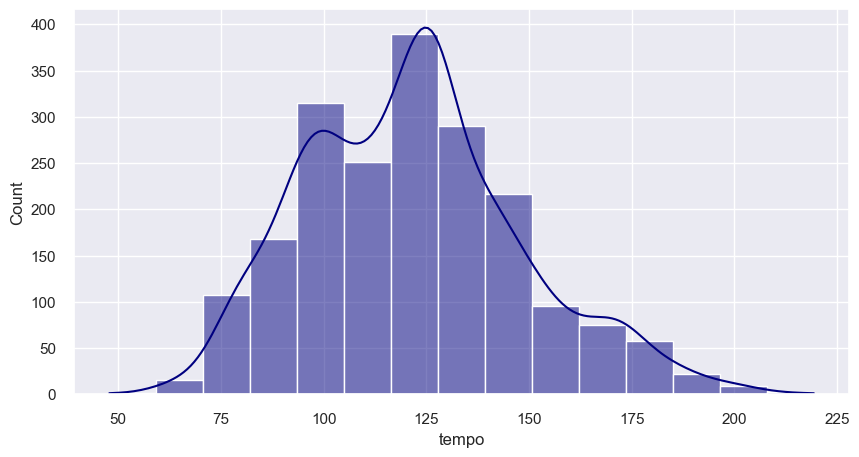

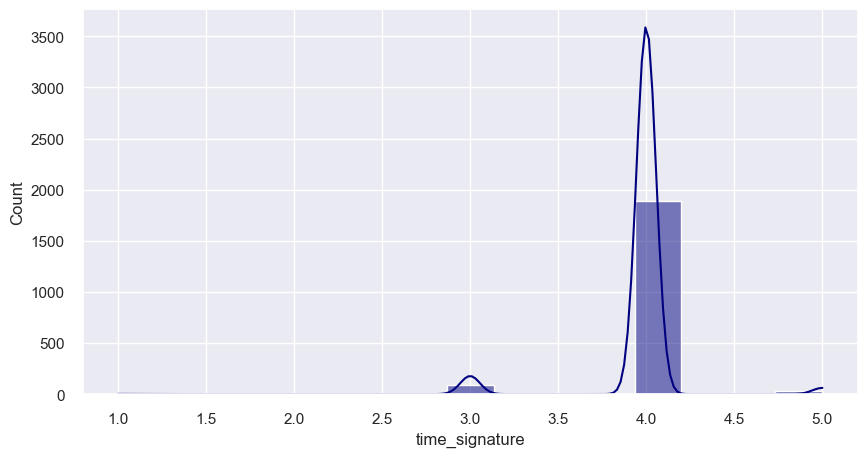

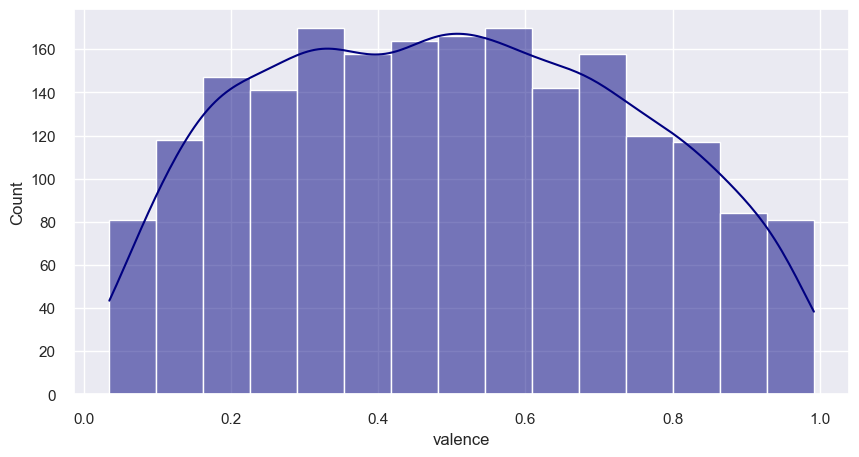

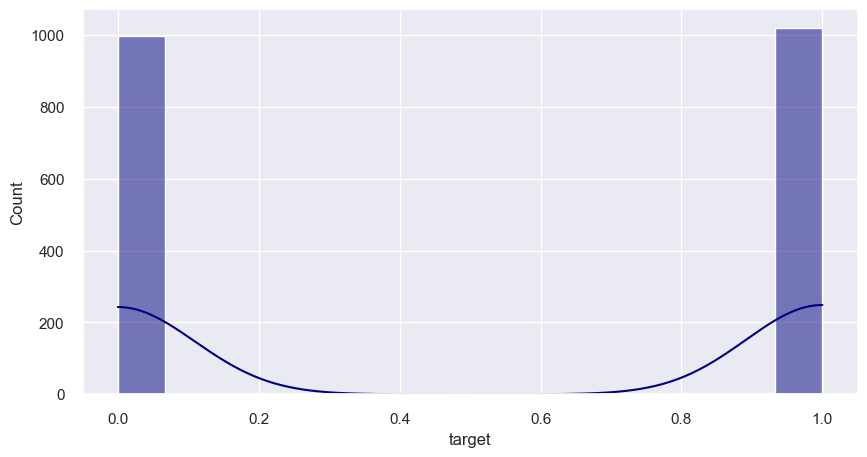

In [99]:
# Lets plot each of the numerical values and see the distributions 

for col in numericals:
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    sns.histplot(x = df[col], kde=True, color="navy", bins=15);


good distribution for valence, tempo, danceability, emergy

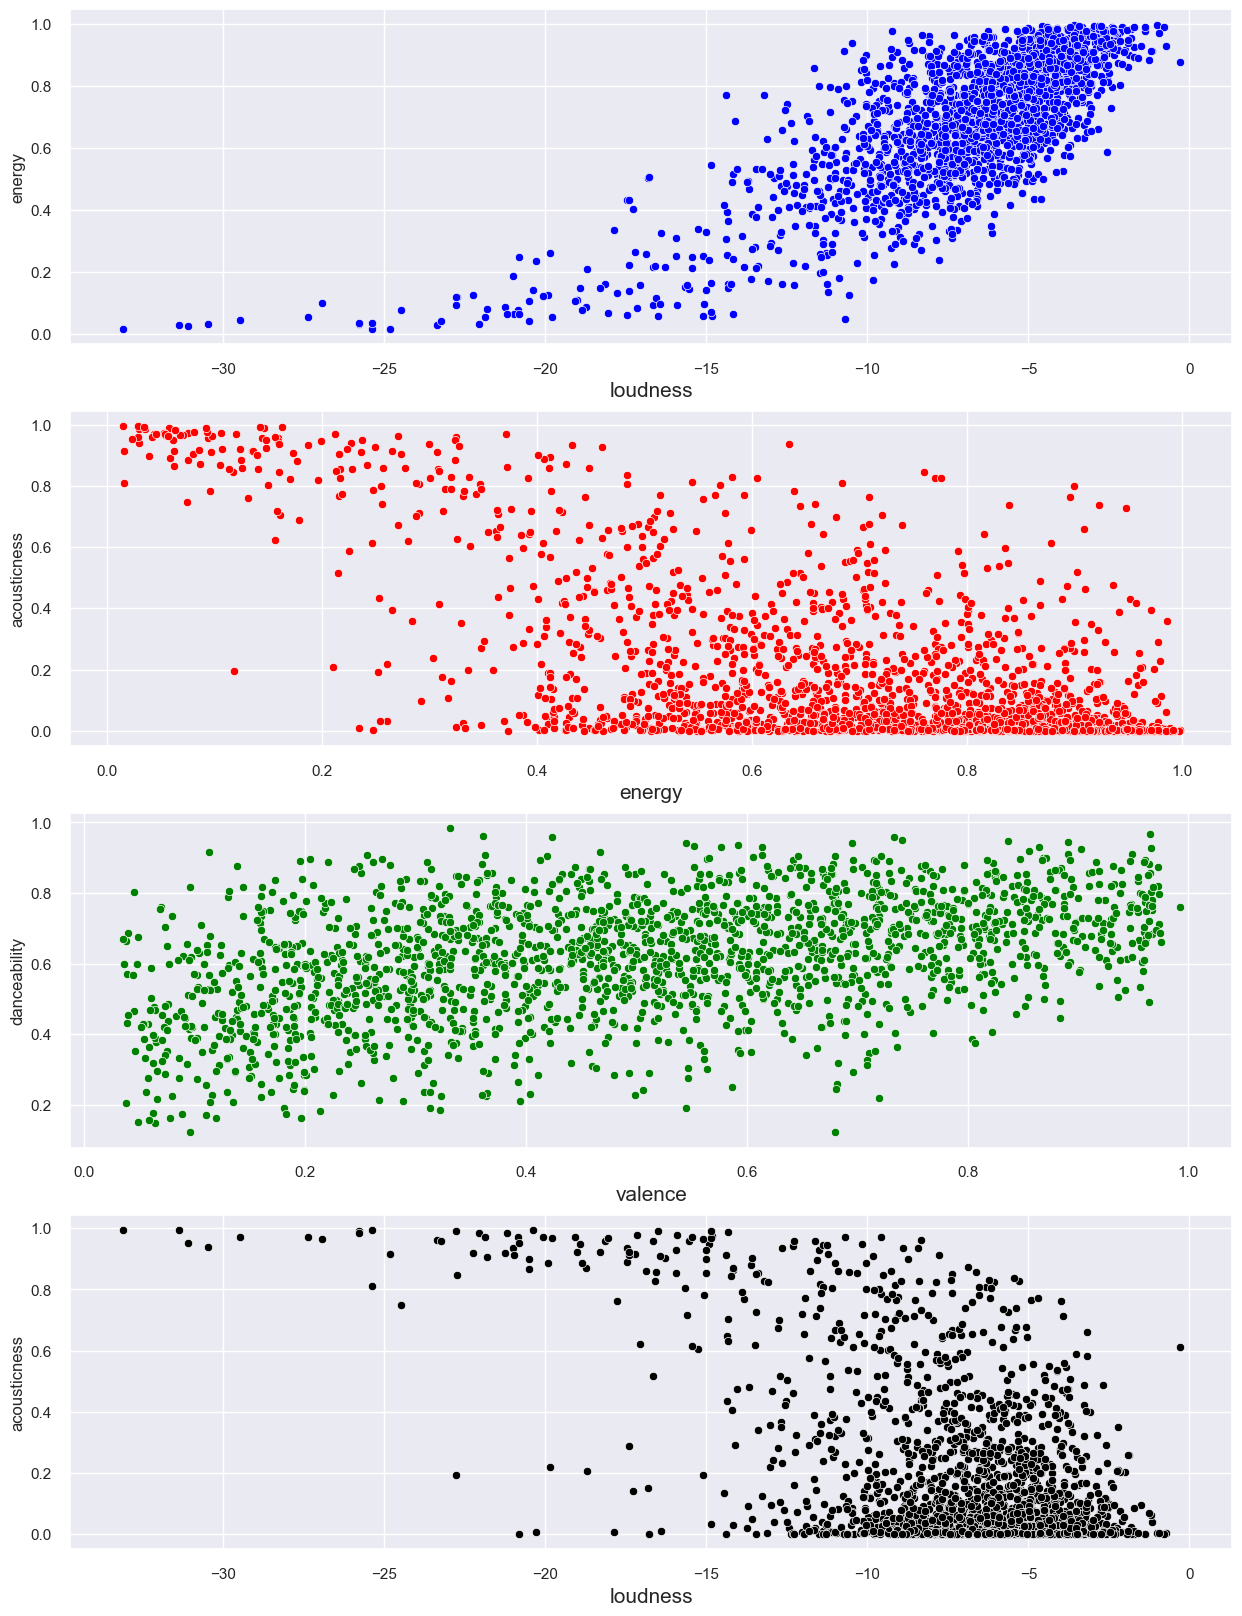

In [107]:
# Let see a scatter plot based on the correlation matrix results - 2 highest and 2 lowest

fig, ax =plt.subplots(4,1, figsize=(15,20)) 

sns.scatterplot(x = df['loudness'], y = df['energy'], ax=ax[0], color="blue");
ax[0].set_xlabel("loudness",fontsize=15);

sns.scatterplot(x = df['energy'], y = df['acousticness'], ax=ax[1], color="red");
ax[1].set_xlabel("energy",fontsize=15);

sns.scatterplot(x = df['valence'], y = df['danceability'], ax=ax[2], color="green");
ax[2].set_xlabel("valence",fontsize=15);

sns.scatterplot(x = df['loudness'], y = df['acousticness'], ax=ax[3], color="black");
ax[3].set_xlabel("loudness",fontsize=15);

### Time to train our model.
We did not have to do any cleaning because the data was already complete and ready for training. Lets prep

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
import xgboost as xgb
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc
random_state = 1

In [112]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=random_state)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=random_state)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['target']
y_val = df_val['target']
y_test = df_test['target']
del df_train['target']
del df_val['target']
del df_test['target']

In [ ]:
# lets start with a Decision Tree 
df_train['target']